In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

admission_df=pd.read_csv('D:/Semester_3/ADMN5016- AI & ML/adm_data.csv',index_col=0)

In [7]:
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [9]:
for col in admission_df.columns:
    print(col)
    print(admission_df[f'{col}'].unique())
    print('*'*75)

GRE Score
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
***************************************************************************
TOEFL Score
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
***************************************************************************
University Rating
[4 3 2 5 1]
***************************************************************************
SOP
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
***************************************************************************
LOR 
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
***************************************************************************
CGPA
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6

In [13]:
admission_df.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
396,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False


In [15]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<AxesSubplot:>

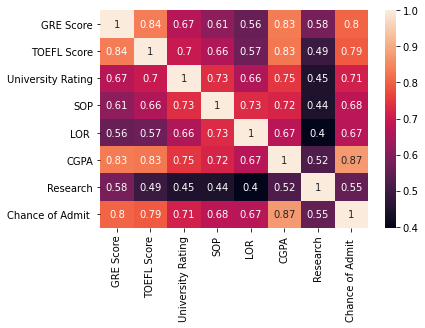

In [21]:
admission_df.corr()
sns.heatmap(admission_df.corr(), annot=True, cbar=True)

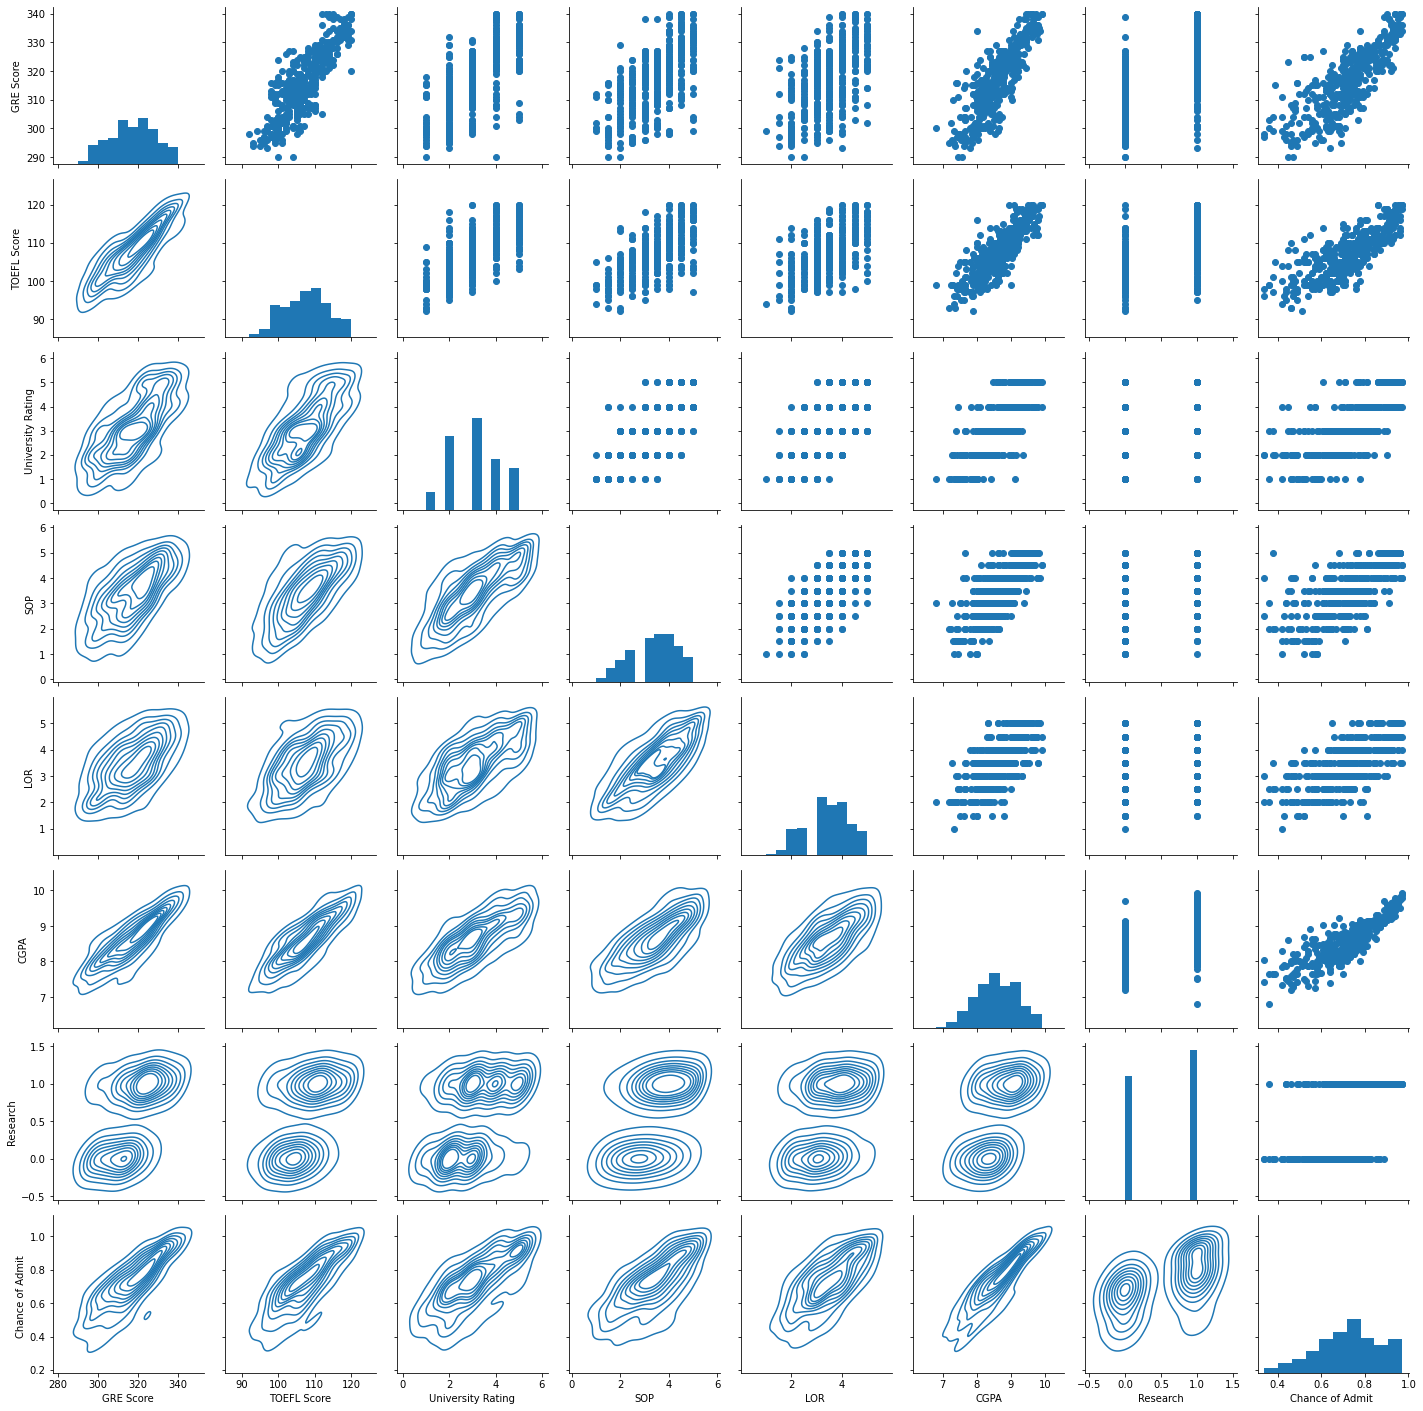

In [28]:
plot = sns.PairGrid(admission_df)
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

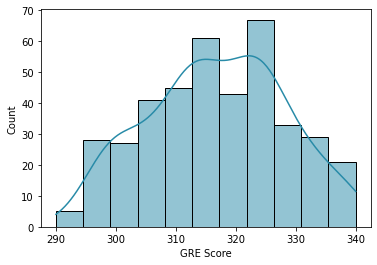

In [29]:
#Plot showcasing the distribution of GRE Score
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(x="GRE Score", data=admission_df,color='#288BA8',kde=True,lw=1)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

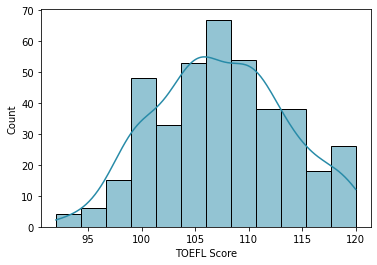

In [30]:
#Plot showcasing the distribution of TOEFL Score
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(x="TOEFL Score", data=admission_df,color='#288BA8',kde=True,lw=1)

<AxesSubplot:xlabel='University Rating', ylabel='count'>

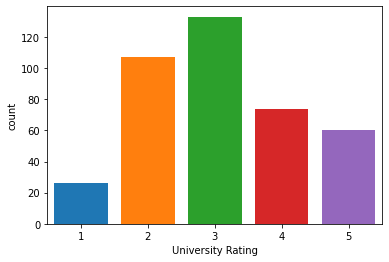

In [31]:
#Countplot for the University Rating
sns.countplot(x=admission_df['University Rating'],saturation=1)

<AxesSubplot:xlabel='Research', ylabel='count'>

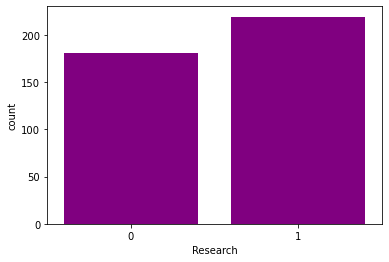

In [33]:
#Countplot for the Research parameter
sns.countplot(x='Research',data=admission_df,saturation=5, color='purple')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [35]:
X=admission_df.drop(['Chance of Admit '],axis=1)
y=admission_df['Chance of Admit ']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# create a linear regression object
lr=LinearRegression()
# fit the model
lr.fit(X_train,y_train)
# predict the values for test data
pred1 = lr.predict(X_test)
pred= lr.predict(X_train)

Score For Train Data : 0.7951946003191085
Score For Test Data : 0.8212082591486991
The mean absolute error: 0.04795673362091198
The mean squared error: 0.004617003377285011
The root mean squared error: 0.06794853476922819




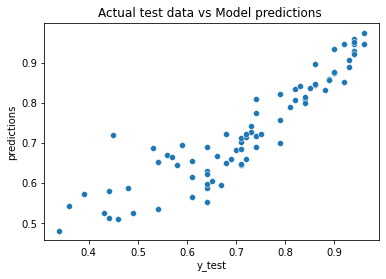

In [37]:
# Regression Score of the model
print('Score For Train Data : {}'.format(lr.score(X_train,y_train)))
print('Score For Test Data : {}'.format(lr.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred1))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred1))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred1);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

In [38]:
# create a regressor object
DTR = DecisionTreeRegressor() 
# fit the model
DTR.fit(X_train,y_train)
# predict the values for test data
pred2 = DTR.predict(X_test)

Score For Train Data : 1.0
Score For Test Data : 0.65491515373375
The mean absolute error: 0.062875
The mean squared error: 0.00891125
The root mean squared error: 0.09439941737108339




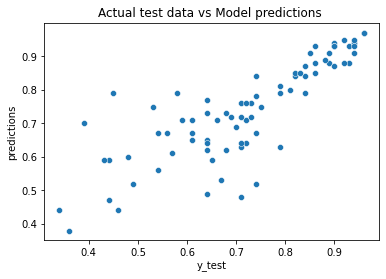

In [40]:
# Regression Score of the model
print('Score For Train Data : {}'.format(DTR.score(X_train,y_train)))
print('Score For Test Data : {}'.format(DTR.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred2))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred2);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

Score For Train Data : 0.9643090562180416
Score For Test Data : 0.8022082380596539
The mean absolute error: 0.050275000000000014
The mean squared error: 0.005107647750000004
The root mean squared error: 0.07146780918707389




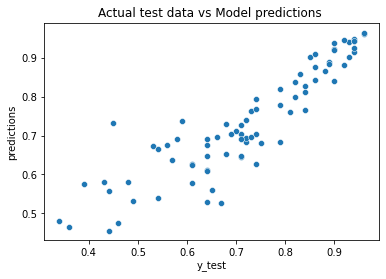

In [43]:
# create regressor object
RFreg = RandomForestRegressor(n_estimators = 100)

# fit the regressor with x and y data
RFreg.fit(X_train,y_train) 
# predict the values for test data
pred3 = RFreg.predict(X_test)

# Regression Score of the model
print('Score For Train Data : {}'.format(RFreg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(RFreg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred3))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred3))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred3);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

In [ ]:
#Within the 3 models, linear regression gives the best result as the RMSE value is low by running linear regression.